
**MO432A - Aprendizado supervisionado**

**Equipe:**

*   Maria Fernanda Tejada Begazo - RA 197488
*   Jose Italo da Costa Silva - RA 265682
*   Gian Franco Joel Condori Luna - RA 234826

**Tarefa 02**

A tarefa foi desenvolvida na linguagem python. Para isso utilizou-se notebooks jupyter no ambiente Google Colaboratory (Google Colab).


In [ ]:
#Primeiro faz-se os imports necessários:
import numpy as np
from numpy import linalg 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import randint
from scipy.stats import loguniform
from scipy.stats import uniform


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
import cv2
import io
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leitura dos dados

Os dados correspondem a base de dados "bias_correction_ucl.csv". Que possui em suas columnas os seguintes dados:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8



Primeiro fez-se a leitura do dataset e removeu-se a coluna **Next\_Tmin** e **Date**. 
Além disso, tambêm removeu-se as filas que tinham informações faltantes. 


In [ ]:
dataFile = "/content/drive/My Drive/Supervised Learning/Bias_correction_ucl (1).csv"
df = pd.read_csv(dataFile, sep=',') 
print("Dimensões originais: ", df.shape)
df = df.dropna() #Eliminar filas com informação faltante
df = df.drop(['Date', 'Next_Tmin'], axis=1) #Eliminar as colunas Date, Next_Tmin
print("Dimensões finais: ", df.shape)
df

Dimensões originais:  (7752, 25)
Dimensões finais:  (7588, 23)


,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6


## Centering e Scaling

Faça o centering and standard scaling para todos os atributos de entrada:

In [ ]:
data = df.to_numpy()
X = data[:,0:len(data[0])]
Y = df['Next_Tmax'].to_numpy()

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Cross validation, medida de erro e busca de hiperparametros

Faz-se 5 repetições de uma validação cruzada aleatória.

Usa-se o RMSE como medida de erro.

In [ ]:
tabela = {}  #Almacena {algoritmo: (RMSE_DEFAULT, RMSE_BEST_HIPERPARAM, TEMPO_BUSQUEDA_HIPER)}
semente = 50 #Valor da semente

def cross_val(modelo_est):
  soma = 0.0
  number_rep = 5
  Xtest_ = 0; Ytest_ = 0; Ypredict_ = 0
  res_melhor = 999999

  kf = KFold(n_splits=number_rep, shuffle=False)
  for train_index, test_index in kf.split(X_norm, Y):
    Xtrain, Ytrain = X_norm[train_index,:], Y[train_index]
    Xtest, Ytest = X_norm[test_index,:], Y[test_index]
    
    md = modelo_est.fit(Xtrain, Ytrain)
    Ypredict = md.predict(Xtest)
    res = mean_squared_error(Ytest, Ypredict, squared=False) #A partir do SKELARN 0.22
    if (res < res_melhor):
      Xtest_ = Xtest
      Ytest_ = Ytest
      Ypredict_ = Ypredict
      res_melhor = res
    soma += res

  # Plot outputs
  
  return soma/number_rep, Xtest_, Ytest_, Ypredict_

def plot_(Xtest_, Ytest_, Ypredict_):
  pca = PCA(n_components=1)
  Xtestt = pca.fit_transform(Xtest_)
  plt.scatter(Xtestt, Ytest_,  color='black', label="Original")
  plt.plot(Xtestt, Ypredict_, 'bo', alpha=0.3, linewidth=3, label="Predito")
  plt.legend()


# Busca de Hiperparametros dos regressores

## Regressão Linear

Não tem hiperparâmetro

RMSE Default: 4.9133e-15 RMSE Best HiperParam:4.9133e-15


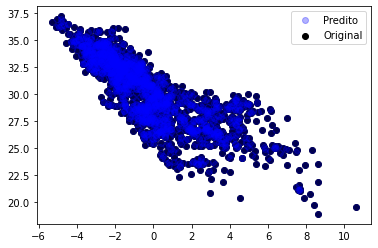

In [ ]:
res, Xt, Yt, Yp = cross_val(LinearRegression())
plot_(Xt, Yt, Yp)

tabela['regressão linear'] = (res,res, 0)
  
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(res,res))

## Linear com regularização L2

alpha: $10$ números aleatórios entre $10^{-3}$ e $10^3$: Uniforme no expoente

Best Params:  {'alpha': 0.023361387149879}
RMSE Default: 0.0012149 RMSE Best HiperParam:2.8414e-05


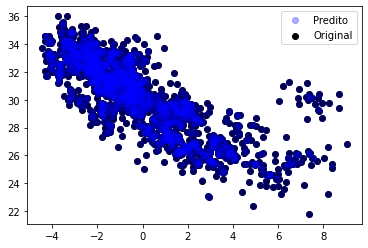

In [ ]:
est = Ridge()

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(alpha = loguniform(10**(-3.0),10**(3.0)))

ini = time.time()
rcv = RandomizedSearchCV(est,param_distributions=pardistr,n_iter=10,cv=5,scoring = 'neg_root_mean_squared_error', 
                         random_state=semente)
res = rcv.fit(X_norm, Y)
melhor = -res.best_score_
fim = time.time()

plot_(Xt, Yt, Yp)
tabela['Regressão Linear L2'] = (z, melhor, fim-ini)

print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## Regressao linear com L1

alpha: $10$ números aleatórios entre $10^{-3}$ e $10^3$: Uniforme no expoente

Best Params:  {'alpha': 0.023361387149879}
RMSE Default: 1.0186 RMSE Best HiperParam:0.023797


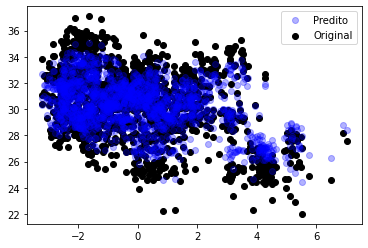

In [ ]:
est = Lasso()

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(alpha = loguniform(10**(-3.0),10**(3.0)))

ini = time.time()
rcv = RandomizedSearchCV(est,param_distributions=pardistr,n_iter=10,cv=5,scoring = 'neg_root_mean_squared_error', 
                         random_state=semente)
res = rcv.fit(X_norm, Y)
melhor = -res.best_score_
fim = time.time()

plot_(Xt, Yt, Yp)
tabela['Regressão Linear L1'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## SVM Linear

Selecione $10$ pares aleatórios ente:

*   epsilon = $0.1$ ou $0.3$
*   C = $2^{-5}$ e $2^{15}$: uniforme no expoente 

Best Params:  {'C': 0.08762778166261179, 'epsilon': 0.1}
RMSE Default: 6.0754e-12 RMSE Best HiperParam:0.099943


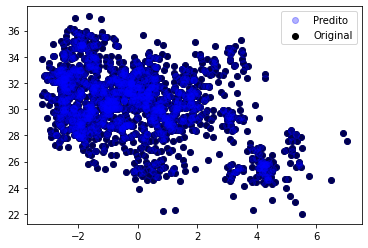

In [ ]:
est = LinearSVR()

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(C = loguniform(2**(-5.0),2**(15.0)), epsilon=[0.1,0.3])

ini = time.time()
rcv = RandomizedSearchCV(est,param_distributions=pardistr,n_iter=10,cv=5,scoring = 'neg_root_mean_squared_error', 
                         random_state=semente)
res = rcv.fit(X_norm,Y)
melhor = -res.best_score_
fim = time.time()

plot_(Xt, Yt, Yp)
tabela['SVM Linear'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## SVM com kernel RBF


Selecione $10$ trincas aleatórias ente:

*   epsilon = $0.1$ ou $0.3$
*   C = $2^{-5}$ e $2^{15}$: uniforme no expoente
*   gamma = $2^{-9}$ e $2^{3}$: uniforme no expoente



Best Params:  {'C': 29.692628587622405, 'epsilon': 0.3, 'gamma': 0.003625810618454122}
RMSE Default: 0.5583 RMSE Best HiperParam:0.16806


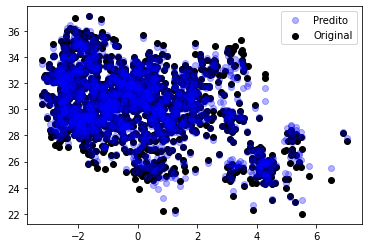

In [ ]:
est = SVR(kernel='rbf')

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(C = loguniform(2**(-5.0),2**15.0), epsilon=[0.1,0.3],gamma=loguniform(2**(-9),2**3))

ini = time.time()
rcv = RandomizedSearchCV(est,param_distributions=pardistr,n_iter=10,cv=5,scoring = 'neg_root_mean_squared_error', 
                         random_state=semente)
res = rcv.fit(X_norm,Y)
melhor = -res.best_score_
fim = time.time()

plot_(Xt, Yt, Yp)
tabela['SVM RBF'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## KNN

K: $10$ números aleatórios entre $1$ e $1000$

Best Params:  {'n_neighbors': 71}
RMSE Default: 1.415 RMSE Best HiperParam:1.4685


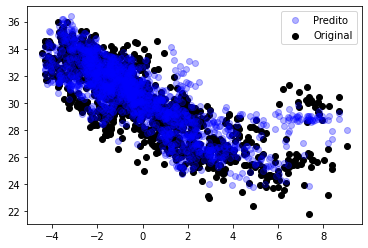

In [ ]:
est = KNeighborsRegressor()

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(n_neighbors = randint(1,1000))

ini = time.time()
rcv = RandomizedSearchCV(est,param_distributions=pardistr,n_iter=10,cv=5,scoring = 'neg_root_mean_squared_error', 
                         random_state=semente)
res = rcv.fit(X_norm, Y)
melhor = -res.best_score_
fim = time.time()   

plot_(Xt, Yt, Yp)
tabela['KNN'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## MLP

Neurônios na cama do meio: de 5 a 20, de três em três

Best Params:  {'hidden_layer_sizes': (9,)}
RMSE Default: 0.38789 RMSE Best HiperParam:0.14299


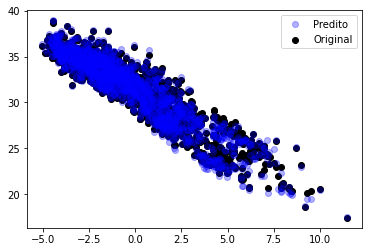

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

est = MLPRegressor(max_iter=400,random_state=semente)

z, Xt, Yt, Yp = cross_val(est)

param_grid = [{'hidden_layer_sizes': [(5,),(7,),(9,),(11,),(13,),(15,),(17,),(19,)]}]

ini = time.time()

rcv = GridSearchCV(est, param_grid, cv=5, scoring= 'neg_root_mean_squared_error')
res = rcv.fit(X_norm, Y)
melhor = -res.best_score_
fim = time.time()   

plot_(Xt, Yt, Yp)
tabela['MLP'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## Árvore de Decisão


Use prunning. 

ccp\_alpha: $10$ números aleátorios entre $0.0$ e $0.04$ 

Best Params:  {'ccp_alpha': 0.009123324177973449}
RMSE Default: 0.035021 RMSE Best HiperParam:0.28907


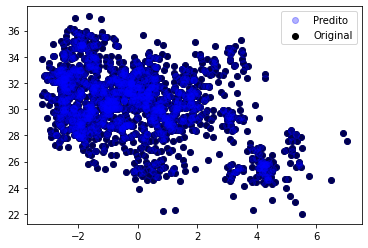

In [ ]:
est = DecisionTreeRegressor()

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(ccp_alpha = uniform(0,0.04))

ini = time.time()
rcv = RandomizedSearchCV(est,param_distributions=pardistr, n_iter=10, cv=5,scoring = 'neg_root_mean_squared_error', 
                         random_state=semente)
res = rcv.fit(X_norm, Y)
melhor = -res.best_score_
fim = time.time()   

plot_(Xt, Yt, Yp)
tabela['Arvore de Decisão'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## Random Forest

Use todas as combinações dos valores abaixo:

*   n\_estimators: use os valores: $10$, $100$, e $1000$
*   nax\_features: use os valores $5$, $10$, e $22$



Best Params:  {'max_features': 22, 'n_estimators': 1000}
RMSE Default: 0.029715 RMSE Best HiperParam:0.029994


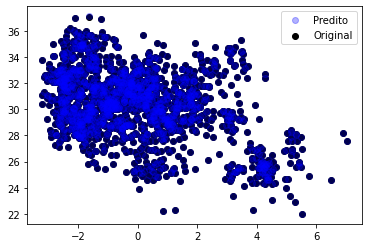

In [ ]:
est = RandomForestRegressor(random_state=semente)

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(n_estimators=[10,100,1000], max_features=[5, 10, 22])

ini = time.time()
rcv = GridSearchCV(est,param_grid=pardistr,cv=5,scoring = 'neg_root_mean_squared_error')
res = rcv.fit(X_norm, Y)
melhor = -res.best_score_
fim = time.time()   

plot_(Xt, Yt, Yp)
tabela['Random Forest'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

## GBM

Selecione $10$ trinca aleatórias entre:


*   n\_estimators: $5$ a $100$
*   learning\_rate: $0.01$ a $0.3$
*   max\_depth: $2$ ou $3$



Best Params:  {'learning_rate': 0.24156819845191407, 'max_depth': 3, 'n_estimators': 73}
RMSE Default: 0.034189 RMSE Best HiperParam:0.056481


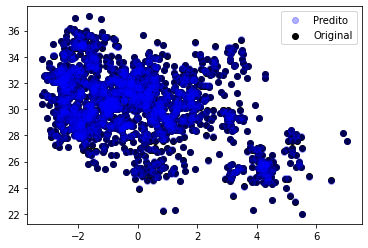

In [ ]:
est = GradientBoostingRegressor(random_state=semente)

z, Xt, Yt, Yp = cross_val(est)

pardistr = dict(n_estimators=randint(5,100), learning_rate=uniform(0.01,0.3),max_depth=[2,3])

ini = time.time()
rcv = RandomizedSearchCV(est,param_distributions=pardistr,n_iter=10,cv=5,scoring = 'neg_root_mean_squared_error', 
                         random_state=semente)
res = rcv.fit(X_norm, Y)
melhor = -res.best_score_
fim = time.time()   

plot_(Xt, Yt, Yp)
tabela['GBM'] = (z, melhor, fim-ini)
print("Best Params: ", res.best_params_)
print('RMSE Default: {:.5} RMSE Best HiperParam:{:.5}'.format(z,melhor))

# Conlusões

Abaixo tem-se a tabela final com cada classificador, seus valores de RMSE com valor default para os hiperaparametros e, o valor do RMSE com o melhor valor dos hiperparametros (Best Hiperparam). Além disso, tem-se os respectivos tempos de execução:


In [ ]:
df = pd.DataFrame(columns=["Algoritmo","RMSE Default","RMSE Best HiperParam", "Tempo"])
i=0
for alg,x in tabela.items():
  try:
    df.loc[i] = alg, x[0], x[1], x[2]
  except:
    df.loc[i] = alg, x, 1000.0, 0.0
  i+=1

pd.set_option('precision', 3)
print(df)

             Algoritmo  RMSE Default  RMSE Best HiperParam  Tempo
0     regressão linear     4.913e-15             4.913e-15      0
1  Regressão Linear L2     1.215e-03             2.841e-05  0.154
2  Regressão Linear L1     1.019e+00             2.380e-02  0.159
3           SVM Linear     6.075e-12             9.994e-02   1.31
4              SVM RBF     5.583e-01             1.681e-01   94.2
5                  KNN     1.415e+00             1.469e+00   26.5
6                  MLP     3.879e-01             1.430e-01    148
7    Arvore de Decisão     3.502e-02             2.891e-01   3.51
8        Random Forest     2.971e-02             2.999e-02    545
9                  GBM     3.419e-02             5.648e-02   68.8


Foi observado que a regressão linear para este tipo de dado foi melhor que os outros algoritmos testados. Tambem observa-se que no SVM linear não foi muito boa a busca de híper parametros, já que o RMSE é mais alto que o default. 

Por conseguinte, o algoritmo que não apresentou um RMSE alto foi o KNN. Além disso, ao observar o tempo que cada algoritmo demora para a busca dos hiper parametros, o random forest demorou mais tempo, seguida do MLP e SVM com Kernel RBF. 

